In [1]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd

from bs4 import BeautifulSoup

## DATA COLLECTION 

In [24]:
def get_jobs(keyword, num_jobs, verbose, path, slp_time):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path = "C:/Users/computer world/Documents/ds_salary_proj/chromedriver",options=options)
    driver.set_window_size(1120, 1000)

    url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    jobs = []
#     resp = driver.page_source
#     soup=BeautifulSoup(resp,'html.parser')

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(slp_time)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element_by_class_name("e1jbctw80").click()  #clicking to the X.
            print("x out worked")
        except NoSuchElementException:
            print("x out failed")
            pass

        
        #Going through each job in this page
#         allJobsContainer = soup.find("ul",{"class":"exy0tjh5"})
#         allJobs = allJobsContainer.find_all("li")
        
        job_listings = driver.find_elements_by_xpath('//li[contains(@class, "eigr9kq3")]')
#         job_list = driver.find_elements_by_xpath('//*[@id="MainCol"]/div/ul/li')
        #job_buttons = driver.find_element_by_class_name("jl") #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_listings:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break
            
            job_button.click()  #You might 
            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    print("hey")
                    company_name = driver.find_element_by_css_selector('div[data-test="employerName"]').text   #company_name = driver.find_element_by_xpath('.//div[contains(@class, "job-search-8wag7x")]').text     
                    location = driver.find_element_by_css_selector('div[data-test="location"]').text       #location = driver.find_element_by_xpath('.//li[contains(@data-test="location")]').text                
                    job_title = driver.find_element_by_css_selector('div[data-test="jobTitle"]').text           #job_title = driver.find_element_by_xpath('.//li[contains(@data-test, "JobTitle")]').text                   
                    job_description = driver.find_element_by_css_selector('div[class="jobDescriptionContent desc"]')       #job_description = driver.find_element_by_xpath('.//li[contains(@data-test="jobDescriptionContent desc")]').text             
                    collected_successfully = True
                    print("hi")
                except Exception as e:
                    time.sleep(5)
                    print(f'{e} occured')

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@data-test="detailSalary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
                print("salary error")
            
            try:
                rating = driver.find_element_by_xpath('.//span[@data-test="detailRating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."
                print("rating error")

            #Printing for debugging
            if verbose:
                    print("Job Title: {}".format(job_title))
                    print("Salary Estimate: {}".format(salary_estimate))
                    print("Job Description: {}".format(job_description[:500]))
                    print("Rating: {}".format(rating))
                    print("Company Name: {}".format(company_name))
                    print("Location: {}".format(location))
            try:
                size= driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Size']//following-sibling::*").text
            except:
                size = "#N/A"
                print("size error")
                pass

            try:
                type_of_ownership = driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Type']//following-sibling::*").text
            except:
                type_of_ownership = "#N/A"
                print("type error")
                pass

            try:
                sector =driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Sector']//following-sibling::*").text
            except:
                sector= "#N/A"
                print("sector error")
                pass

            try:
                industry =driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Industry']//following-sibling::*").text
            except:
                industry="#N/A"
                print("industry error")
                pass

            try:
                founded = driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Founded']//following-sibling::*").text
            except:
                founded ="#N/A"
                print("founded error")
                pass

            try:
                revenue =driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Revenue']//following-sibling::*").text
            except:
                revenue ="#N/A"
                print("revenue error")
                pass
                
            if verbose:
#                 print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
#                 print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector, 
            "Revenue" : revenue})
            #add job to jobs

        #Clicking on the "next page" button
#         try: 
#             driver.find_element_by_xpath('.//button[@class="nextButton"]').click()
#         except NoSuchElementException:
#             print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
#             break
        try:
            driver.find_element_by_class_name("nextButton").click()   
            time.sleep(4)
        except NoSuchElementException:
            print("scraping terminated")
            
    return pd.DataFrame(jobs).reset_index()

In [25]:
#This line will open a new chrome window and start the scraping.
path = "C:/Users/computer world/Documents/ds_salary_proj/chromedriver"
dataframe = get_jobs("data scientist", 800, False, path, 15)

x out worked
Progress: 0/800
hey
hi
salary error
Progress: 1/800
hey
hi
salary error
founded error
Progress: 2/800
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
hi
Progress: 3/800
hey
hi
Progress: 4/800
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
hi
founded error
Progress: 5/800
hey
hi
founded error
Progress: 6/800
hey
hi
salary error
founded error
Progress: 7/800
hey
hi
rating error

Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
hi
Progress: 140/800
hey
hi
Progress: 141/800
hey
hi
sector error
industry error
founded error
Progress: 142/800
hey
hi
salary error
Progress: 143/800
hey
hi
Progress: 144/800
hey
hi
rating error
Progress: 145/800
hey
hi
Progress: 146/800
hey
hi
Progress: 147/800
hey
hi
Progress: 148/800
hey
hi
founded error
Progress: 149/800
hey
hi
x out failed
Progress: 150/800
hey
hi
salary error
founded error
Progress: 151/800
hey
hi
founded error
Progress: 152/800
hey
hi
Progress: 153/

Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
hi
salary error
Progress: 339/800
hey
hi
salary error
founded error
Progress: 340/800
hey
hi
founded error
Progress: 341/800
hey
hi
Progress: 342/800
hey
hi
salary error
Progress: 343/800
hey
hi
salary error
sector error
industry error
founded error
Progress: 344/800
hey
hi
Progress: 345/800
hey
hi
Progress: 346/800
hey
hi
Progress: 347/800
hey
hi
Progress: 348/800
hey
hi
Progress: 349/800
hey
hi
Progress: 350/800
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
Message: no such element: Unable to locate element: {"me

hey
hi
salary error
Progress: 481/800
hey
hi
Progress: 482/800
hey
hi
Progress: 483/800
hey
hi
Progress: 484/800
hey
hi
salary error
Progress: 485/800
hey
hi
salary error
sector error
industry error
founded error
Progress: 486/800
hey
hi
rating error
sector error
industry error
founded error
Progress: 487/800
hey
hi
salary error
Progress: 488/800
hey
hi
Progress: 489/800
hey
hi
Progress: 490/800
hey
hi
rating error
size error
type error
sector error
industry error
founded error
revenue error
Progress: 491/800
hey
hi
Progress: 492/800
hey
hi
Progress: 493/800
hey
hi
Progress: 494/800
hey
hi
Progress: 495/800
hey
hi
founded error
Progress: 496/800
hey
hi
Progress: 497/800
hey
hi
Progress: 498/800
hey
hi
Progress: 499/800
hey
hi
Progress: 500/800
hey
hi
salary error
Progress: 501/800
hey
hi
Progress: 502/800
hey
hi
Progress: 503/800
hey
hi
salary error
founded error
Progress: 504/800
hey
hi
Progress: 505/800
hey
hi
Progress: 506/800
hey
hi
Progress: 507/800
hey
hi
Progress: 508/800
hey
hi

hey
hi
Progress: 693/800
hey
hi
Progress: 694/800
hey
hi
salary error
Progress: 695/800
hey
hi
Progress: 696/800
hey
hi
salary error
Progress: 697/800
hey
hi
rating error
sector error
industry error
founded error
Progress: 698/800
hey
hi
Progress: 699/800
hey
hi
salary error
sector error
industry error
founded error
Progress: 700/800
hey
hi
salary error
founded error
Progress: 701/800
hey
hi
rating error
size error
type error
sector error
industry error
founded error
revenue error
Progress: 702/800
hey
hi
salary error
Progress: 703/800
hey
hi
Progress: 704/800
hey
hi
Progress: 705/800
hey
hi
Progress: 706/800
hey
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[data-test="employerName"]"}
  (Session info: chrome=114.0.5735.134)
 occured
hey
hi
Progress: 707/800
hey
hi
salary error
Progress: 708/800
hey
hi
Progress: 709/800
hey
hi
Progress: 710/800
hey
hi
Progress: 711/800
hey
hi
Progress: 712/800
hey
hi
Progress: 713/800
hey
hi
Progress: 714/

In [26]:
dataframe

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,0,Sr. Data Scientist,-1,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Pinterest\n3.9,Remote,1001 to 5000 Employees,2010,Company - Public,Internet & Web Services,Information Technology,$100 to $500 million (USD)
1,1,Data Scientist,-1,<selenium.webdriver.remote.webelement.WebEleme...,4.4,Intone Networks\n4.4,Remote,201 to 500 Employees,#N/A,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD)
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD)
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD)
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD)
798,798,"Data Scientist, Mid",Employer Provided Salary:$73K - $166K,<selenium.webdriver.remote.webelement.WebEleme...,4.2,Booz Allen Hamilton\n4.2,"Washington, DC",10000+ Employees,1914,Company - Public,Business Consulting,Management & Consulting,$5 to $10 billion (USD)


## DATA CLEANING 

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)

import warnings
warnings.filterwarnings("ignore")

In [29]:
df = dataframe
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,0,Sr. Data Scientist,-1,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Pinterest\n3.9,Remote,1001 to 5000 Employees,2010,Company - Public,Internet & Web Services,Information Technology,$100 to $500 million (USD)
1,1,Data Scientist,-1,<selenium.webdriver.remote.webelement.WebEleme...,4.4,Intone Networks\n4.4,Remote,201 to 500 Employees,#N/A,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD)
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD)
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD)
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD)
798,798,"Data Scientist, Mid",Employer Provided Salary:$73K - $166K,<selenium.webdriver.remote.webelement.WebEleme...,4.2,Booz Allen Hamilton\n4.2,"Washington, DC",10000+ Employees,1914,Company - Public,Business Consulting,Management & Consulting,$5 to $10 billion (USD)


In [30]:
#Salary Parsing
#Company name text only
#State field
#Age of company
#parsing of job description

In [43]:
df_ = df[df['Salary Estimate'] != -1]
df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD)
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD)
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD)


In [49]:
#Salary Parasing, use
salary = df_['Salary Estimate'].apply(lambda x : x.split('(')[0])
salary

2                          Employer Provided Salary:$95K
3                   Employer Provided Salary:$55K - $60K
4                                          $72K - $102K 
5                                          $72K - $102K 
7                   Employer Provided Salary:$50K - $65K
                             ...                        
794                 Employer Provided Salary:$50K - $65K
795                                        $96K - $133K 
796                                       $104K - $137K 
797    Employer Provided Salary:$31.00 - $37.00 Per Hour
798                Employer Provided Salary:$73K - $166K
Name: Salary Estimate, Length: 595, dtype: object

In [51]:
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))
minus_Kd

2                          Employer Provided Salary:95
3                     Employer Provided Salary:55 - 60
4                                            72 - 102 
5                                            72 - 102 
7                     Employer Provided Salary:50 - 65
                            ...                       
794                   Employer Provided Salary:50 - 65
795                                          96 - 133 
796                                         104 - 137 
797    Employer Provided Salary:31.00 - 37.00 Per Hour
798                  Employer Provided Salary:73 - 166
Name: Salary Estimate, Length: 595, dtype: object

In [53]:
df_['hourly'] = df_['Salary Estimate'].apply(lambda x : 1 if 'per hour' in x.lower() else 0)
df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1


In [54]:
df_['Employer_provided'] = df_['Salary Estimate'].apply(lambda x : 1 if 'employer provided salary' in x.lower() else 0)
df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1


In [119]:
min_hr = minus_Kd.apply(lambda x : x.lower().replace('per hour','').replace('employer provided salary:',''))
min_hr

2                  95
3             55 - 60
4           72 - 102 
5           72 - 102 
7             50 - 65
            ...      
794           50 - 65
795         96 - 133 
796        104 - 137 
797    31.00 - 37.00 
798          73 - 166
Name: Salary Estimate, Length: 595, dtype: object

In [88]:
min_not_hr = min_hr.apply(lambda x : 0 if '-' in x.lower() else 1)
min_not_hr.value_counts()

0    556
1     39
Name: Salary Estimate, dtype: int64

In [82]:
(min_not_hr==0)

2      False
3       True
4       True
5       True
7       True
       ...  
794     True
795     True
796     True
797     True
798     True
Name: Salary Estimate, Length: 595, dtype: bool

In [90]:
min_not_hr = min_not_hr.drop(index = min_not_hr[min_not_hr==0].index)

In [92]:
min_not_hr.index

Int64Index([  2,  55,  57,  63,  75,  84,  96, 102, 123, 129, 158, 185, 199,
            215, 229, 244, 255, 277, 292, 307, 310, 353, 376, 398, 434, 465,
            494, 527, 539, 557, 569, 585, 613, 643, 673, 698, 728, 759, 789],
           dtype='int64')

In [120]:
min_hr_ = min_hr.drop(index=min_not_hr.index)

In [94]:
min_hr[1:].apply(lambda x : x.split('-')[1])

4         102 
5         102 
7           65
8         113 
10        131 
        ...   
794         65
795       133 
796       137 
797     37.00 
798        166
Name: Salary Estimate, Length: 555, dtype: object

In [121]:
df_['min_salary'] = min_hr_.apply(lambda x : x.split('-')[0])
df_['max_salary'] = min_hr_.apply(lambda x : x.split('-')[1])

df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1,NaN,NaN
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,55,60
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72,102
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72,102
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50,65
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0,96,133
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0,104,137
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1,31.00,37.00


In [98]:
df_[['min_salary','max_salary']].isna()

,min_salary,max_salary
2,True,True
3,False,False
4,False,False
5,False,False
7,False,False
...,...,...
794,False,False
795,False,False
796,False,False
797,False,False


In [136]:
df_.loc[df_['min_salary'].isna(),['min_salary','max_salary']] = min_

,min_salary,max_salary
2,NaN,NaN
55,NaN,NaN
57,NaN,NaN
63,NaN,NaN
75,NaN,NaN
84,NaN,NaN
96,NaN,NaN
102,NaN,NaN
123,NaN,NaN
129,NaN,NaN


In [137]:
df_.loc[df_['min_salary'].isna(),['min_salary','max_salary']] = min_hr.drop(index = min_hr_.index)

In [122]:
min_hr.drop(index = min_hr_.index)

2          95
55        145
57        183
63        145
75        183
84        136
96        136
102    28.52 
123       136
129    28.52 
158    28.52 
185        95
199       136
215        95
229       136
244        95
255       136
277        95
292       136
307        95
310       136
353       136
376        95
398        95
434        95
465        95
494        95
527        95
539       136
557        95
569       136
585        95
613        95
643        95
673        95
698        95
728        95
759        95
789        95
Name: Salary Estimate, dtype: object

In [138]:
df_[['min_salary','max_salary']]

,min_salary,max_salary
2,95,95
3,55,60
4,72,102
5,72,102
7,50,65
...,...,...
794,50,65
795,96,133
796,104,137
797,31.00,37.00


In [139]:
df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1,95,95
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,55,60
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72,102
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72,102
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50,65
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0,96,133
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0,104,137
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1,31.00,37.00


In [146]:
df_.min_salary = df_.min_salary.astype('float64')
df_.max_salary = df_.max_salary.astype('float64')

In [147]:
df_['avg_salary'] = (df_['min_salary'] + df_['max_salary'])/2
df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary,avg_salary
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1,95.0,95.0,95.0
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,55.0,60.0,57.5
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0,96.0,133.0,114.5
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0,104.0,137.0,120.5
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1,31.0,37.0,34.0


In [151]:
df_['Rating'] = df['Rating'].astype('float32')

In [229]:
df_['company_txt'] = df_.apply(lambda x : x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3],axis=1)

In [153]:
df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary,avg_salary,company_txt
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1,95.0,95.0,95.0,VirginPulse\n
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,55.0,60.0,57.5,Augray\n
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0,96.0,133.0,114.5,Navy Federal Credit Union\n
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0,104.0,137.0,120.5,UT Southwestern\n
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1,31.0,37.0,34.0,Torc Robotics\n


In [158]:
 df_[df_['Location']=='Remote']['Location']

2      Remote
11     Remote
19     Remote
21     Remote
23     Remote
        ...  
728    Remote
743    Remote
759    Remote
774    Remote
789    Remote
Name: Location, Length: 63, dtype: object

In [160]:
df_['job_state'] = df_['Location'].apply(lambda x : x.split(',')[1] if ',' in x.lower() else 'remote')
df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1,95.0,95.0,95.0,VirginPulse\n,remote
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,55.0,60.0,57.5,Augray\n,WI
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,#N/A,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0,96.0,133.0,114.5,Navy Federal Credit Union\n,VA
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0,104.0,137.0,120.5,UT Southwestern\n,TX
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1,31.0,37.0,34.0,Torc Robotics\n,TX


In [163]:
df_.job_state.value_counts()

 CA       131
remote     74
 VA        64
 TX        55
 DC        52
 MN        33
 MI        30
 IL        26
 WI        23
 FL        18
 TN        18
 MD        15
 NJ        14
 MA        12
 KS         5
 CT         5
 NY         4
 NC         4
 GA         4
 MO         3
 CO         2
 IA         1
 VT         1
 OH         1
Name: job_state, dtype: int64

In [175]:
df_.loc[df_.Founded=='#N/A','Founded'] = -1

df_.Founded.unique()

array(['2004', '2014', -1, '1952', '1945', '1871', '2007', '1870', '2005',
       '1980', '2006', '1927', '1973', '1891', '1996', '1998', '1944',
       '1866', '1851', '1971', '2002', '1864', '1962', '1933', '2009',
       '1972', '1969', '1775', '1923', '1701', '2017', '1901', '1915',
       '1828', '1948', '1861', '1965', '1837', '2010', '1946', '2000',
       '1914', '1845', '1943', '1984', '2013', '2003', '1746', '2015',
       '1956', '1961', '1999', '1919', '1967'], dtype=object)

In [179]:
df_['Founded'] = df_['Founded'].astype(int) 

In [181]:
df_['age'] = df_['Founded'].apply(lambda x : x if x<1 else 2023 -x)

df_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,...,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age
2,2,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,...,Information Technology,$100 to $500 million (USD),0,1,95.0,95.0,95.0,VirginPulse\n,remote,19
3,3,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,...,Information Technology,Unknown / Non-Applicable,0,1,55.0,60.0,57.5,Augray\n,WI,9
4,4,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,...,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA,-1
5,5,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,...,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA,-1
7,7,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,...,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,...,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1
795,795,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,...,Financial Services,Unknown / Non-Applicable,0,0,96.0,133.0,114.5,Navy Federal Credit Union\n,VA,90
796,796,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,...,Healthcare,$1 to $5 billion (USD),0,0,104.0,137.0,120.5,UT Southwestern\n,TX,80
797,797,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,...,Information Technology,$25 to $100 million (USD),1,1,31.0,37.0,34.0,Torc Robotics\n,TX,16


In [182]:
df_['Job Description']

2      <selenium.webdriver.remote.webelement.WebEleme...
3      <selenium.webdriver.remote.webelement.WebEleme...
4      <selenium.webdriver.remote.webelement.WebEleme...
5      <selenium.webdriver.remote.webelement.WebEleme...
7      <selenium.webdriver.remote.webelement.WebEleme...
                             ...                        
794    <selenium.webdriver.remote.webelement.WebEleme...
795    <selenium.webdriver.remote.webelement.WebEleme...
796    <selenium.webdriver.remote.webelement.WebEleme...
797    <selenium.webdriver.remote.webelement.WebEleme...
798    <selenium.webdriver.remote.webelement.WebEleme...
Name: Job Description, Length: 595, dtype: object

In [190]:
df_ = df_.reset_index().drop(columns='index')

df_

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age
0,Data Scientist I,Employer Provided Salary:$95K,<selenium.webdriver.remote.webelement.WebEleme...,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1,95.0,95.0,95.0,VirginPulse\n,remote,19
1,Junior Data Scientist,Employer Provided Salary:$55K - $60K,<selenium.webdriver.remote.webelement.WebEleme...,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,55.0,60.0,57.5,Augray\n,WI,9
2,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA,-1
3,Junior Data Scientist,$72K - $102K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA,-1
4,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Data Scientist - l,Employer Provided Salary:$50K - $65K,<selenium.webdriver.remote.webelement.WebEleme...,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1
591,Data Scientist I,$96K - $133K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0,96.0,133.0,114.5,Navy Federal Credit Union\n,VA,90
592,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),<selenium.webdriver.remote.webelement.WebEleme...,3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0,104.0,137.0,120.5,UT Southwestern\n,TX,80
593,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,<selenium.webdriver.remote.webelement.WebEleme...,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1,31.0,37.0,34.0,Torc Robotics\n,TX,16


In [193]:
df_.drop(columns='Job Description',inplace=True)
df_

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,Employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age
0,Data Scientist I,Employer Provided Salary:$95K,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),0,1,95.0,95.0,95.0,VirginPulse\n,remote,19
1,Junior Data Scientist,Employer Provided Salary:$55K - $60K,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,55.0,60.0,57.5,Augray\n,WI,9
2,Junior Data Scientist,$72K - $102K (Glassdoor est.),3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA,-1
3,Junior Data Scientist,$72K - $102K (Glassdoor est.),3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,0,0,72.0,102.0,87.0,Choice Fitness\n,GA,-1
4,Data Scientist - l,Employer Provided Salary:$50K - $65K,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Data Scientist - l,Employer Provided Salary:$50K - $65K,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,#N/A,#N/A,#N/A,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1
591,Data Scientist I,$96K - $133K (Glassdoor est.),4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,0,0,96.0,133.0,114.5,Navy Federal Credit Union\n,VA,90
592,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),0,0,104.0,137.0,120.5,UT Southwestern\n,TX,80
593,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),1,1,31.0,37.0,34.0,Torc Robotics\n,TX,16


In [194]:
df_out = df_.to_csv("salary_data_cleaned.csv")

## Exploratory Data Analysis

In [198]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return np.nan
    
def seniority(title):
    if 'sr'in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return np.nan

In [199]:
df_['Job_Simplified'] = df_['Job Title'].apply(title_simplifier)

In [200]:
df_.Job_Simplified.value_counts()

data scientist    581
analyst            12
Name: Job_Simplified, dtype: int64

In [202]:
df_['seniority']= df_['Job Title'].apply(seniority)
df_['seniority'].value_counts()

senior    79
jr         4
Name: seniority, dtype: int64

In [204]:
df_['seniority'].isna().sum()

512

In [207]:
df_['job_state'].value_counts()

 CA       131
remote     74
 VA        64
 TX        55
 DC        52
 MN        33
 MI        30
 IL        26
 WI        23
 FL        18
 TN        18
 MD        15
 NJ        14
 MA        12
 KS         5
 CT         5
 NY         4
 NC         4
 GA         4
 MO         3
 CO         2
 IA         1
 VT         1
 OH         1
Name: job_state, dtype: int64

In [212]:
df['min_salary'] = df_.apply(lambda x : x.min_salary*2 if x.hourly ==1 else x.min_salary,axis=1)
df['max_salary'] = df_.apply(lambda x : x.max_salary*2 if x.hourly ==1 else x.max_salary,axis=1)

In [213]:
df_[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,95.0,95.0
1,0,55.0,60.0
2,0,72.0,102.0
3,0,72.0,102.0
4,0,50.0,65.0
...,...,...,...
590,0,50.0,65.0
591,0,96.0,133.0
592,0,104.0,137.0
593,1,31.0,37.0


In [233]:
df_.company_txt = df_.company_txt.str.strip()

In [234]:
# df_.company_txt = df_.company_txt.apply(lambda x : x.strip())
df_.company_txt

0                    VirginPulse
1                         Augray
2                 Choice Fitness
3                 Choice Fitness
4            JARB Management Inc
                 ...            
590          JARB Management Inc
591    Navy Federal Credit Union
592              UT Southwestern
593                Torc Robotics
594          Booz Allen Hamilton
Name: company_txt, Length: 595, dtype: object

In [224]:
df_.describe()

,Rating,Founded,hourly,Employer_provided,min_salary,max_salary,avg_salary,age
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,3.701683,1623.751261,0.067227,0.591597,90.248975,130.659832,110.454403,52.105882
std,1.152276,741.226331,0.250625,0.491952,27.785277,38.851456,31.544822,53.967697
min,-1.000000,-1.000000,0.000000,0.000000,24.180000,28.520000,28.520000,-1.000000
25%,3.700000,1870.000000,0.000000,0.000000,75.000000,113.000000,97.000000,10.000000
50%,4.000000,1952.000000,0.000000,1.000000,93.000000,136.000000,114.500000,27.000000
75%,4.100000,1998.000000,0.000000,1.000000,110.000000,159.000000,134.000000,80.000000
max,5.000000,2017.000000,1.000000,1.000000,183.000000,241.000000,200.500000,322.000000


In [235]:
df_.columns = df_.columns.str.lower()
df_

,job title,salary estimate,rating,company name,location,size,founded,type of ownership,industry,sector,...,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,job_simplified,seniority
0,Data Scientist I,Employer Provided Salary:$95K,3.4,VirginPulse\n3.4,Remote,501 to 1000 Employees,2004,Company - Private,Computer Hardware Development,Information Technology,...,0,1,95.0,95.0,95.0,VirginPulse,remote,19,data scientist,NaN
1,Junior Data Scientist,Employer Provided Salary:$55K - $60K,3.9,Augray\n3.9,"Brookfield, WI",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,...,0,1,55.0,60.0,57.5,Augray,WI,9,data scientist,NaN
2,Junior Data Scientist,$72K - $102K (Glassdoor est.),3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,Beauty & Wellness,Personal Consumer Services,...,0,0,72.0,102.0,87.0,Choice Fitness,GA,-1,data scientist,NaN
3,Junior Data Scientist,$72K - $102K (Glassdoor est.),3.3,Choice Fitness\n3.3,"Atlanta, GA",Unknown,-1,Company - Public,Beauty & Wellness,Personal Consumer Services,...,0,0,72.0,102.0,87.0,Choice Fitness,GA,-1,data scientist,NaN
4,Data Scientist - l,Employer Provided Salary:$50K - $65K,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,#N/A,#N/A,...,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1,data scientist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Data Scientist - l,Employer Provided Salary:$50K - $65K,-1.0,JARB Management Inc,"Clearwater, FL",#N/A,-1,#N/A,#N/A,#N/A,...,0,1,50.0,65.0,57.5,JARB Management Inc,FL,-1,data scientist,NaN
591,Data Scientist I,$96K - $133K (Glassdoor est.),4.1,Navy Federal Credit Union\n4.1,"Vienna, VA",10000+ Employees,1933,Self-employed,Banking & Lending,Financial Services,...,0,0,96.0,133.0,114.5,Navy Federal Credit Union,VA,90,data scientist,NaN
592,"Data Scientist II, Cardiology",$104K - $137K (Glassdoor est.),3.9,UT Southwestern\n3.9,"Dallas, TX",10000+ Employees,1943,Hospital,Health Care Services & Hospitals,Healthcare,...,0,0,104.0,137.0,120.5,UT Southwestern,TX,80,data scientist,NaN
593,Data Scientist Co-Op - Masters Degree - Fall 2023,Employer Provided Salary:$31.00 - $37.00 Per Hour,4.3,Torc Robotics\n4.3,"Austin, TX",501 to 1000 Employees,2007,Company - Private,Software Development,Information Technology,...,1,1,31.0,37.0,34.0,Torc Robotics,TX,16,data scientist,NaN


<AxesSubplot:>

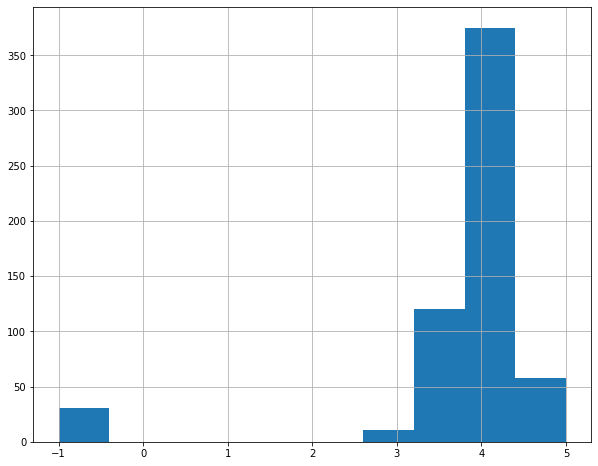

In [237]:
df_.rating.hist()

<AxesSubplot:>

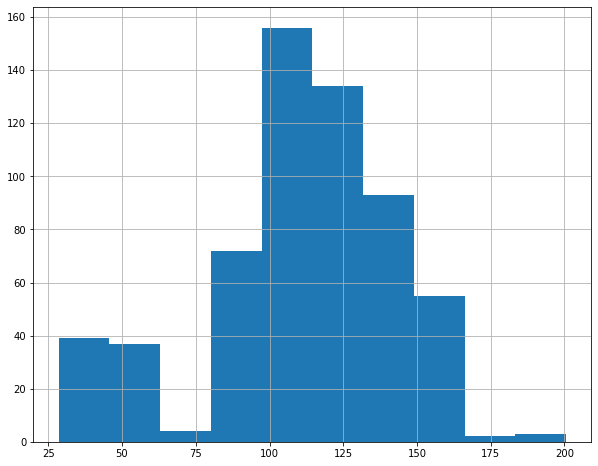

In [238]:
df_.avg_salary.hist()

<AxesSubplot:>

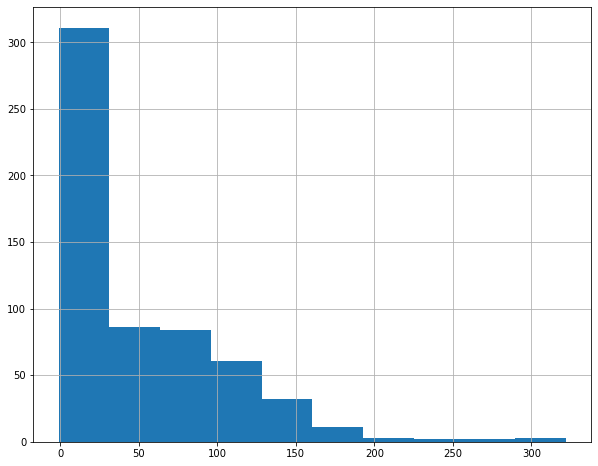

In [239]:
df_.age.hist()

<AxesSubplot:xlabel='rating'>

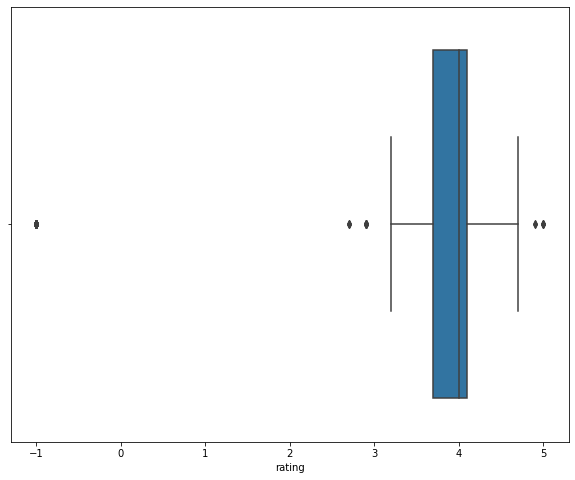

In [243]:
sns.boxplot('rating',data=df_)

<AxesSubplot:>

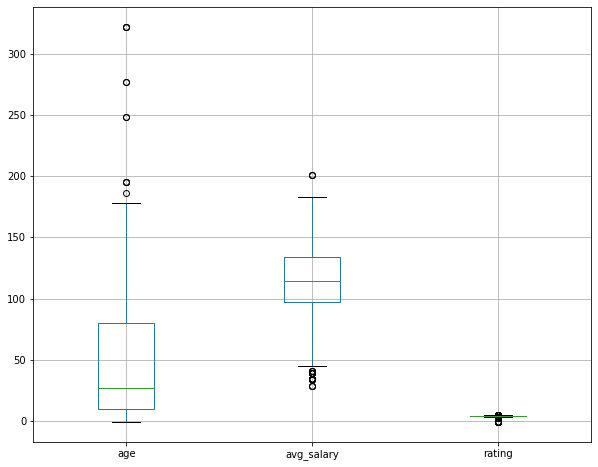

In [242]:
df_.boxplot(column=['age','avg_salary','rating'])

In [247]:
categorical_var = [col for col in df_.select_dtypes(object).columns]
continuous_var = [col for col in df_.drop(columns=categorical_var)]

<AxesSubplot:>

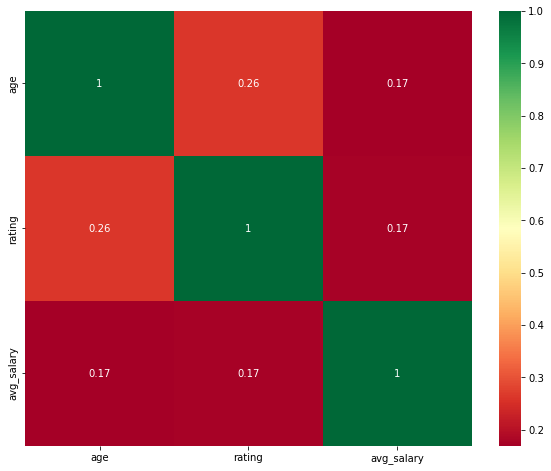

In [250]:
sns.heatmap(df_[['age','rating','avg_salary']].corr(),annot=True, cmap="RdYlGn")

In [252]:
categorical_var

['job title',
 'salary estimate',
 'company name',
 'location',
 'size',
 'type of ownership',
 'industry',
 'sector',
 'revenue',
 'company_txt',
 'job_state',
 'job_simplified',
 'seniority']

In [272]:
df_cat = df_[['location','size','type of ownership','company_txt','industry','sector','revenue','job_state','job_simplified','seniority']]

In [257]:
df_['location']

Index(['Remote', 'San Francisco, CA', 'Washington, DC', 'San Jose, CA',
       'Austin, TX', 'Vienna, VA', 'Minneapolis, MN', 'Dallas, TX',
       'Reston, VA', 'Brookfield, WI', 'Lake Forest, IL', 'Palo Alto, CA',
       'Detroit, MI', 'Collierville, TN', 'Chantilly, VA', 'Clearwater, FL',
       'Princeton, NJ', 'United States', 'Columbia, MD', 'Rochester, MN',
       'Livonia, MI', 'Cambridge, MA', 'Los Angeles, CA', 'Boston, MA',
       'Syracuse, NY', 'Lawrence, KS', 'Deerfield, IL',
       'Research Triangle Park, NC', 'New Haven, CT', 'Richardson, TX',
       'Southfield, MI', 'Atlanta, GA', 'Lone Tree, CO', 'San Antonio, TX',
       'Fort Detrick, MD', 'Arlington, VA', 'Linthicum Heights, MD',
       'Jacksonville, FL', 'Fort Benning, GA', 'Chesterfield, MO',
       'Jupiter, FL', 'Camden, NJ', 'Santa Monica, CA', 'Topeka, KS',
       'Stamford, CT', 'Silver Spring, MD', 'Fort Eustis, VA', 'Dublin, OH',
       'Melville, NY', 'Fort Meade, MD', 'Mettawa, IL', 'Mexico, MO',
     

graph for location : total = 56


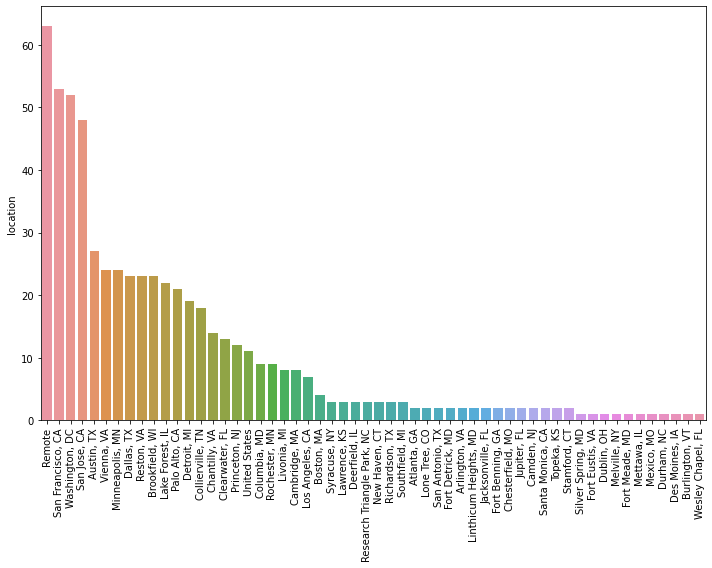

graph for size : total = 9


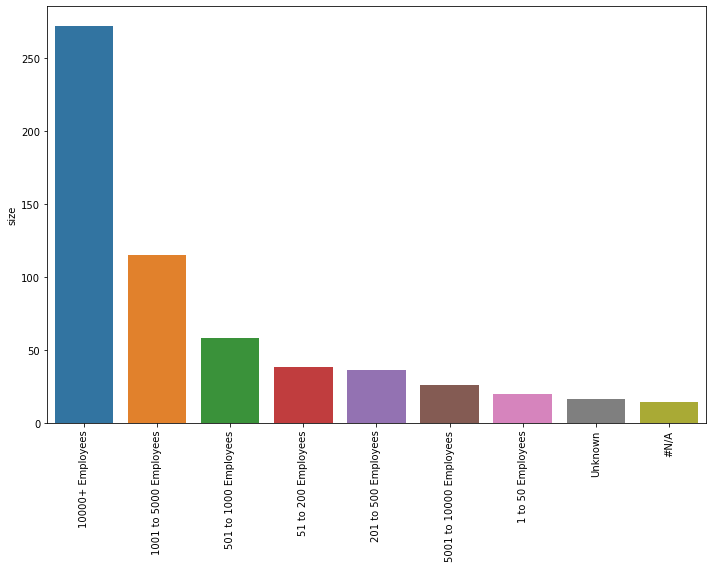

graph for type of ownership : total = 11


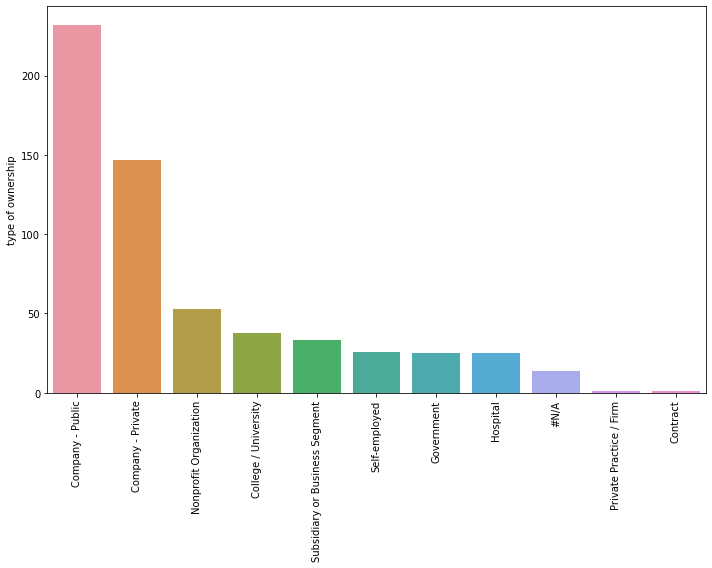

graph for company_txt : total = 93


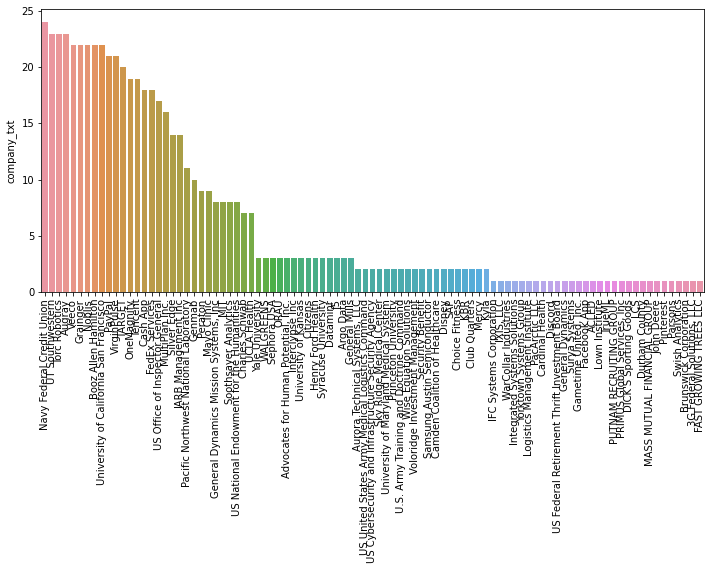

graph for industry : total = 37


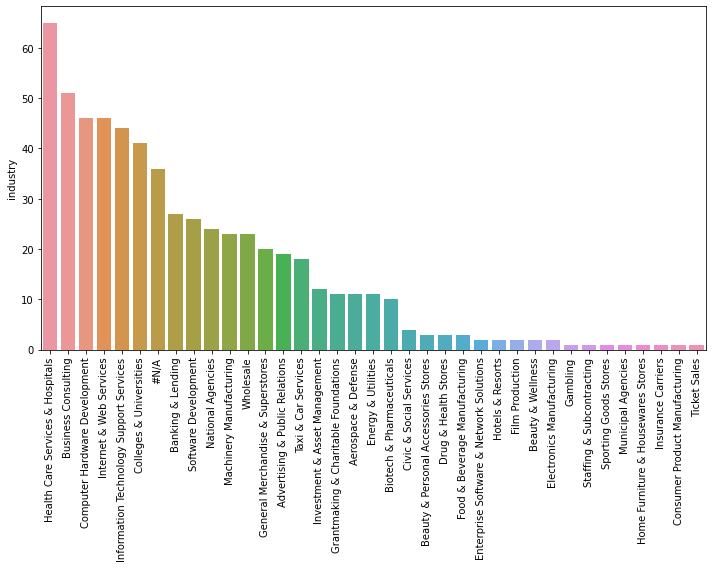

graph for sector : total = 20


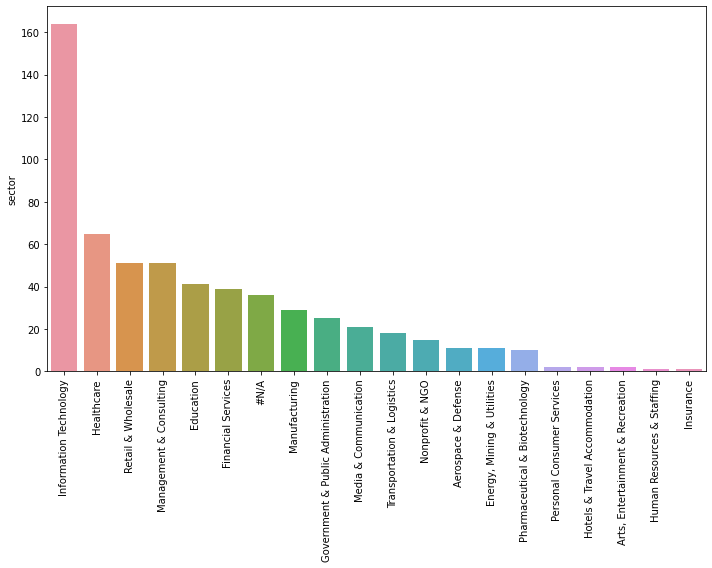

graph for revenue : total = 11


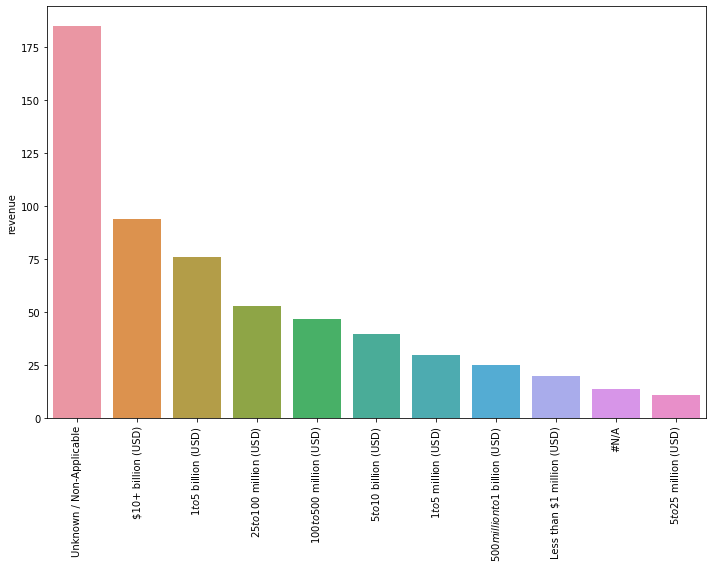

graph for job_state : total = 24


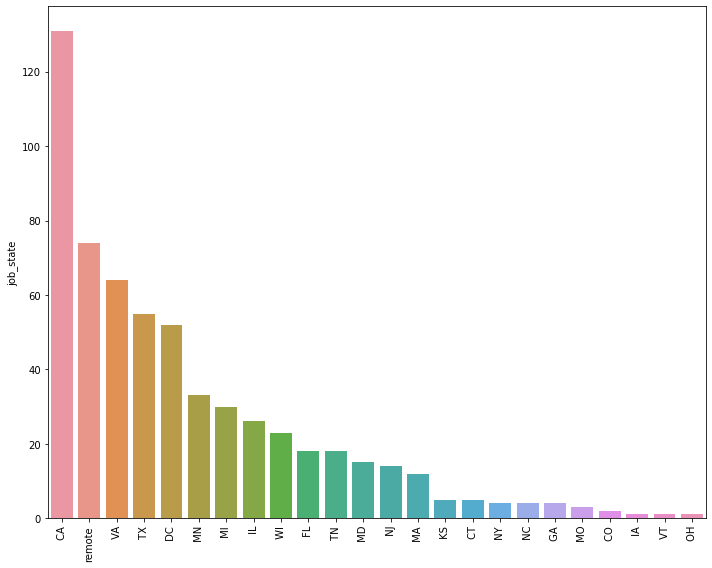

graph for job_simplified : total = 2


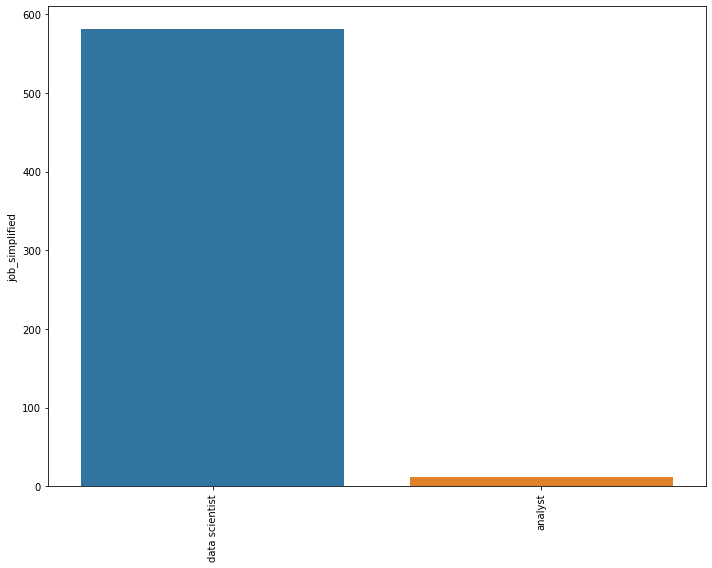

graph for seniority : total = 2


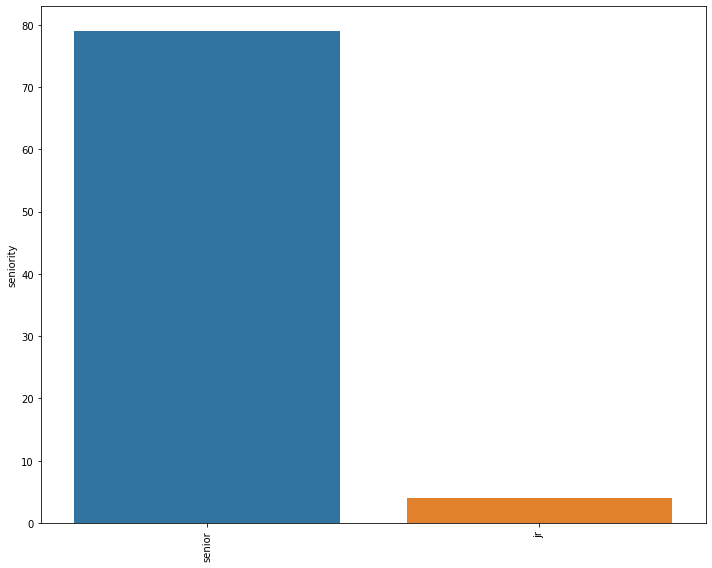

In [273]:
for col in df_cat.columns:
    cat_num = df_cat[col].value_counts()
    print(f"graph for {col} : total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index,y=cat_num,)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.tight_layout()
    plt.show()

In [274]:
#PIVOT TABLES
df_.columns

Index(['job title', 'salary estimate', 'rating', 'company name', 'location',
       'size', 'founded', 'type of ownership', 'industry', 'sector', 'revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'job_simplified', 'seniority'],
      dtype='object')

In [286]:
pd.pivot_table(df_, index=['job_simplified','job_state'],values='avg_salary',aggfunc='count')

avg_salary
job_simplified job_state            
analyst         MN                 9
               remote              3
data scientist  CA               129
                CO                 2
                CT                 5
                DC                52
                FL                18
                GA                 4
                IA                 1
                IL                26
                KS                 5
                MA                12
                MD                15
                MI                30
                MN                24
                MO                 3
                NC                 4
                NJ                14
                NY                 4
                OH                 1
                TN                18
                TX                55
                VA                64
                VT                 1
                WI                23
               remote             71

In [288]:
df_pivots = df_[['rating', 'industry','sector','revenue','hourly','employer_provided','type of ownership']]

In [300]:
for pivot in df_pivots.columns:
    print(pivot)
    print(pd.pivot_table(data=df_,index=pivot,values='avg_salary').sort_values('avg_salary',ascending=False))

rating
        avg_salary
rating            
 3.7    141.905405
 3.6    131.015625
 3.5    130.750000
 4.5    123.000000
 4.1    122.933824
 4.4    121.290698
 2.7    116.000000
 4.0    115.128866
 3.8    113.476190
 4.9    109.500000
 4.7    106.500000
 4.2    105.437436
 3.4     98.108696
 3.9     97.331414
 2.9     97.000000
 3.2     95.916667
 3.3     91.000000
 4.3     90.186275
-1.0     83.306452
 5.0     80.375000
industry
                                         avg_salary
industry                                           
Enterprise Software & Network Solutions  183.000000
Beauty & Personal Accessories Stores     161.000000
Staffing & Subcontracting                160.000000
Film Production                          159.000000
National Agencies                        146.625000
Biotech & Pharmaceuticals                141.500000
Insurance Carriers                       141.000000
Gambling                                 140.000000
Energy & Utilities                       136.0

In [301]:
df_exploratory = df_.to_csv("data exploration.csv")

## modelBuilding 

In [ ]:
#choose relevant columns
# get dummy data
#train test validation
#multiple linear regression
#lasso regression
#random forest Regression
#test ensembles

In [303]:
df_model = df_[['rating','size','type of ownership','industry','sector','hourly','employer_provided','job_state','age','avg_salary']]

df_model

,rating,size,type of ownership,industry,sector,hourly,employer_provided,job_state,age,avg_salary
0,3.4,501 to 1000 Employees,Company - Private,Computer Hardware Development,Information Technology,0,1,remote,19,95.0
1,3.9,51 to 200 Employees,Subsidiary or Business Segment,Information Technology Support Services,Information Technology,0,1,WI,9,57.5
2,3.3,Unknown,Company - Public,Beauty & Wellness,Personal Consumer Services,0,0,GA,-1,87.0
3,3.3,Unknown,Company - Public,Beauty & Wellness,Personal Consumer Services,0,0,GA,-1,87.0
4,-1.0,#N/A,#N/A,#N/A,#N/A,0,1,FL,-1,57.5
...,...,...,...,...,...,...,...,...,...,...
590,-1.0,#N/A,#N/A,#N/A,#N/A,0,1,FL,-1,57.5
591,4.1,10000+ Employees,Self-employed,Banking & Lending,Financial Services,0,0,VA,90,114.5
592,3.9,10000+ Employees,Hospital,Health Care Services & Hospitals,Healthcare,0,0,TX,80,120.5
593,4.3,501 to 1000 Employees,Company - Private,Software Development,Information Technology,1,1,TX,16,34.0


In [306]:
df_dum = pd.get_dummies(df_model)
df_dum

,rating,hourly,employer_provided,age,avg_salary,size_#N/A,size_1 to 50 Employees,size_10000+ Employees,size_1001 to 5000 Employees,size_201 to 500 Employees,...,job_state_ NC,job_state_ NJ,job_state_ NY,job_state_ OH,job_state_ TN,job_state_ TX,job_state_ VA,job_state_ VT,job_state_ WI,job_state_remote
0,3.4,0,1,19,95.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.9,0,1,9,57.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.3,0,0,-1,87.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.3,0,0,-1,87.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.0,0,1,-1,57.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,-1.0,0,1,-1,57.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
591,4.1,0,0,90,114.5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
592,3.9,0,0,80,120.5,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
593,4.3,1,1,16,34.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#With sklearn.OneHotEncoder on the other hand, 
#once we've created the encoder, 
#we can reuse it to produce the same output every time, 
#with columns only for "red" and "green". 
#And we can explicitly control what happens when it encounters 
#the new level "blue": if we think that's impossible, 
#then we can tell it to throw an error with 
#handle_unknown="error"; otherwise we can tell it to 
#continue and simply set the red and green columns to 0, 
#with handle_unknown="ignore".

In [307]:
X = df_dum.drop(columns='avg_salary')
y = df_dum['avg_salary']

In [313]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.16,random_state=0)

In [317]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     67.38
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          1.53e-192
Time:                        20:21:02   Log-Likelihood:                -1800.8
No. Observations:                 499   AIC:                             3750.
Df Residuals:                     425   BIC:                             4061.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               82.0294      5.510     14.887      0.000      71.199      92.860
rating                                              -2.5392      1.950     -1.302      0.194      -6.372       1.294
hourly                                             -78.6402      4.781    -16.448      0.000     -88.038     -69.243
employer_provided                                    1.9921      4.010      0.497      0.620      -5.890       9.874
age                                                  0.1113      0.043      2.606      0.009       0.027       0.195
size_#N/A                                          -16.6460      5.861     -2.840      0.005     -28.166      -5.126
size_1 to 50 Employees                              54.4288     10.183      5.345      0.000      34.413      74.445
size_10000+ Employees                              -17.5289      7.008     -2.501      0.013     -31.304      -3.754
size_1001 to 5000 Employees                         27.1262      3.723      7.287      0.000      19.809      34.444
size_201 to 500 Employees                            2.4705     10.018      0.247      0.805     -17.220      22.161
size_5001 to 10000 Employees                        14.0545      6.824      2.060      0.040       0.642      27.467
size_501 to 1000 Employees                          19.1699      4.714      4.067      0.000       9.904      28.436
size_51 to 200 Employees                            15.7460      4.556      3.456      0.001       6.790      24.702
size_Unknown                                       -16.7917      5.946     -2.824      0.005     -28.480      -5.104
type of ownership_#N/A                             -16.6460      5.861     -2.840      0.005     -28.166      -5.126
type of ownership_College / University              38.2769      6.528      5.864      0.000      25.446      51.107
type of ownership_Company - Private                  0.0658      5.264      0.013      0.990     -10.281      10.413
type of ownership_Company - Public                  40.5321      5.327      7.609      0.000      30.062      51.002
type of ownership_Contract                         -26.8520     13.273     -2.023      0.044     -52.940      -0.764
type of ownership_Government                        -0.4547      4.239     -0.107      0.915      -8.787       7.878
type of ownership_Hospital                          49.7667     11.515      4.322      0.000      27.132      72.401
type of ownership_Nonprofit Organization            14.0897      6.036      2.334      0.020       2.225      25.954
type of ownership_Private Practice / Firm          -73.6229     17.753     -4.147      0.000    -108.518     -38.727
type of ownership_Self-employed          

In [319]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

cv = cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)

"""‘accuracy’
‘balanced_accuracy’
‘roc_auc’
‘f1’
‘neg_mean_absolute_error’
‘neg_root_mean_squared_error’
‘r2’"""

In [321]:
np.mean(cv)

-10.567186304184565

In [329]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.03)

np.mean(cross_val_score(lasso,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-7.571698564205128

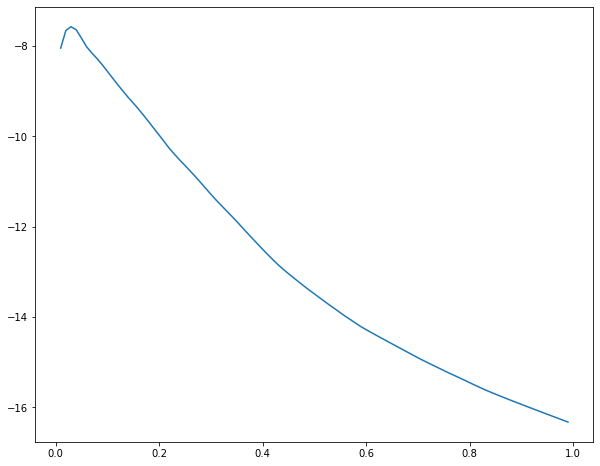

In [325]:
alpha = []
error =[]

for i in range(1,100):
    alpha.append(i/100)
    lasso = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lasso,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
    
plt.plot(alpha,error)

In [328]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','errors'])

df_err[df_err.errors==max(df_err.errors)]

,alpha,errors
2,0.03,-7.571699


In [330]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-3.625673899934369

In [331]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

grid = GridSearchCV(rf,param_grid=param_grid,cv=3,scoring="neg_mean_absolute_error")

In [332]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [333]:
print(f"best score : {grid.best_score_}")
print(f"best estimator : {grid.best_estimator_}")

best score : -3.133248168894568
best estimator : RandomForestRegressor(criterion='mae', max_features='auto', n_estimators=70)


In [338]:
from sklearn.metrics import mean_absolute_error

y_pred_train = grid.best_estimator_.predict(X_train)
y_pred_test = grid.best_estimator_.predict(X_test)

print(f" train error : {mean_absolute_error(y_train,y_pred_train)}")
print(f" test error : {mean_absolute_error(y_test,y_pred_test)}")

 train error : 1.3818631548811915
 test error : 2.937009672619048


In [336]:
lasso = Lasso(alpha=0.03)
lasso.fit(X_train,y_train)

lasso_pred_test = lasso.predict(X_test)
print(f" lasso error : {mean_absolute_error(y_test,lasso_pred_test)}")

 lasso error : 8.723641230263722


In [337]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.03)
ridge.fit(X_train,y_train)
ridge_pred_test = ridge.predict(X_test)
print(f" ridge error : {mean_absolute_error(y_test,ridge_pred_test)}")

 ridge error : 7.030711498815016


## Model to Production

In [341]:
import pickle

pickl = {'model': grid.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [343]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [344]:
model

RandomForestRegressor(criterion='mae', max_features='auto', n_estimators=70)

In [355]:
grid.predict(np.array(X_test.iloc[1,:]).reshape(1,-1))[0]

152.0

In [357]:
data_in = [3.700000047683716, 0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [359]:
import requests

URL = " http://127.0.0.1:5000/predict"
headers = {"Content-Type" : "application/json"}
data = {"input": data_in}

r = requests.get(URL, headers=headers, json=data)

In [360]:
r.json()

{'response': 152.0}

In [3]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd

In [6]:

def get_jobs(keyword, num_jobs, verbose, path, slp_time):

    '''Gathers jobs as a dataframe, scraped from Glassdoor'''

    #Initializing the webdriver
    options = webdriver.ChromeOptions()

    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')

    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path="C:/Users/computer world/Documents/ds_salary_proj/chromedriver", options=options)
    driver.set_window_size(1120, 1000)

    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
    #url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(slp_time)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element_by_css_selector('[alt="Close"]').click() #clicking to the X.
            print(' x out worked')
        except NoSuchElementException:
            print(' x out failed')
            pass


        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("jl")  #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_buttons:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break
            try:
                job_button.click()  #You might 
                time.sleep(1)
                collected_successfully = False
            except:
                continue
            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="gray salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."

            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                    headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1


            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs


        #Clicking on the "next page" button
        try:
            page = driver.find_element_by_xpath('.//div[@class="tbl fill padHorz margVert"]').text
            page = page.split()
            if page[1]==page[3]:
                break
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs).reset_index()  #This line converts the dictionary object into a pandas DataFrame.


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".selected"}
  (Session info: chrome=114.0.5735.134)


In [ ]:
from selenium import webdriver
from shutil import which
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, ElementNotInteractableException
import pandas as pd
import time


def fetch_jobs(keyword, num_pages):
    options = Options()
    options.add_argument("window-size=1920,1080")
    #Enter your chromedriver.exe path below
    chrome_path = r"C:\Users\Admin\Desktop\Work\Selenium\scraping-glassdoor-selenium-master\chromedriver.exe"
    driver = webdriver.Chrome(executable_path=chrome_path, options=options)
    driver.get("https://www.glassdoor.co.in/Job/Home/recentActivity.htm")
    search_input = driver.find_element_by_id("sc.keyword")
    search_input.send_keys(keyword)
    search_input.send_keys(Keys.ENTER)
    time.sleep(2)
    
    
    
    
    company_name = []
    job_title = []
    salary_est = []
    location = []
    job_description = []
    salary_estimate = []
    company_size = []
    company_type = []
    company_sector = []
    company_industry = []
    company_founded = []
    company_revenue = []
    
    
    
    #Set current page to 1
    current_page = 1     
        
        
    time.sleep(3)
    
    while current_page <= num_pages:   
        
        done = False
        while not done:
            job_cards = driver.find_elements_by_xpath("//article[@id='MainCol']//ul/li[@data-adv-type='GENERAL']")
            for card in job_cards:
                card.click()
                time.sleep(1)

                #Closes the signup prompt
                try:
                    driver.find_element_by_xpath(".//span[@class='SVGInline modal_closeIcon']").click()
                    time.sleep(2)
                except NoSuchElementException:
                    time.sleep(2)
                    pass

                #Expands the Description section by clicking on Show More
                try:
                    driver.find_element_by_xpath("//div[@class='css-t3xrds e856ufb2']").click()
                    time.sleep(1)
                except NoSuchElementException:
                    card.click()
                    print(str(current_page) + '#ERROR: no such element')
                    time.sleep(30)
                    driver.find_element_by_xpath("//div[@class='css-t3xrds e856ufb2']").click()
                except ElementNotInteractableException:
                    card.click()
                    driver.implicitly_wait(30)
                    print(str(current_page) + '#ERROR: not interactable')
                    driver.find_element_by_xpath("//div[@class='css-t3xrds e856ufb2']").click()

                #Scrape 

                try:
                    company_name.append(driver.find_element_by_xpath("//div[@class='css-xuk5ye e1tk4kwz5']").text)
                except:
                    company_name.append("#N/A")
                    pass

                try:
                    job_title.append(driver.find_element_by_xpath("//div[@class='css-1j389vi e1tk4kwz2']").text)
                except:
                    job_title.append("#N/A")
                    pass

                try:
                    location.append(driver.find_element_by_xpath("//div[@class='css-56kyx5 e1tk4kwz1']").text)
                except:
                    location.append("#N/A")
                    pass

                try:
                    job_description.append(driver.find_element_by_xpath("//div[@id='JobDescriptionContainer']").text)
                except:
                    job_description.append("#N/A")
                    pass

                try:
                    salary_estimate.append(driver.find_element_by_xpath("//div[@class='css-y2jiyn e2u4hf18']").text)
                except:
                    salary_estimate.append("#N/A")
                    pass
                
                try:
                    company_size.append(driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Size']//following-sibling::*").text)
                except:
                    company_size.append("#N/A")
                    pass
                
                try:
                    company_type.append(driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Type']//following-sibling::*").text)
                except:
                    company_type.append("#N/A")
                    pass
                    
                try:
                    company_sector.append(driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Sector']//following-sibling::*").text)
                except:
                    company_sector.append("#N/A")
                    pass
                    
                try:
                    company_industry.append(driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Industry']//following-sibling::*").text)
                except:
                    company_industry.append("#N/A")
                    pass
                    
                try:
                    company_founded.append(driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Founded']//following-sibling::*").text)
                except:
                    company_founded.append("#N/A")
                    pass
                    
                try:
                    company_revenue.append(driver.find_element_by_xpath("//div[@id='CompanyContainer']//span[text()='Revenue']//following-sibling::*").text)
                except:
                    company_revenue.append("#N/A")
                    pass
                    
                    
                    
                    
                done = True
                
       # Moves to the next page         
        if done:
            print(str(current_page) + ' ' + 'out of' +' '+ str(num_pages) + ' ' + 'pages done')
            driver.find_element_by_xpath("//span[@alt='next-icon']").click()   
            current_page = current_page + 1
            time.sleep(4)
            




    driver.close()
    df = pd.DataFrame({'company': company_name, 
    'job title': job_title,
    'location': location,
    'job description': job_description,
    'salary estimate': salary_estimate,
    'company_size': company_size,
    'company_type': company_type,
    'company_sector': company_sector,
    'company_industry' : company_industry, 'company_founded' : company_founded, 'company_revenue': company_revenue})
    
    df.to_csv(keyword + '.csv')

In [ ]:
fetch_jobs("Data Engineer", 10)

In [ ]:
path = "chromedriver"

df = get_jobs('data scientist',1500, False, path, 4)
df.to_csv('Uncleaned_DS_jobs.csv', index=False)

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def scrape_glassdoor_jobs(keyword, num_jobs):
    # Set up the Chrome driver
    options = webdriver.ChromeOptions()
    options.add_argument('headless')  # Uncomment this line if you want to run in headless mode
    driver = webdriver.Chrome(executable_path="C:/Users/computer world/Documents/ds_salary_proj/chromedriver",options=options)

    # Navigate to the Glassdoor job search page
    url = f'https://www.glassdoor.com/Job/jobs.htm?sc.keyword={keyword}&locT=C&locId=1147401'
    driver.get(url)

    # Wait until the job listings are loaded
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'jl')))

    # Scrape job details
    job_listings = driver.find_elements(By.CLASS_NAME, 'jl')

    jobs = []
    for job_listing in job_listings[:num_jobs]:
        job = {}

        # Extract job details
        job_title = job_listing.find_element(By.CLASS_NAME, 'jobLink').text
        company_name = job_listing.find_element(By.CLASS_NAME, 'companyName').text
        location = job_listing.find_element(By.CLASS_NAME, 'loc').text

        # Add job details to the list
        job['Job Title'] = job_title
        job['Company Name'] = company_name
        job['Location'] = location

        jobs.append(job)

    # Close the browser
    driver.quit()

    return jobs

# Example usage
keyword = 'data science'
num_jobs = 10
jobs = scrape_glassdoor_jobs(keyword, num_jobs)

# Print the scraped job details
for job in jobs:
    print('Job Title:', job['Job Title'])
    print('Company Name:', job['Company Name'])
    print('Location:', job['Location'])
    print('---')


TimeoutException: Message: 


In [20]:
import os
from selenium import webdriver

options = webdriver.ChromeOptions()
path = "C:/Users/computer world/Documents/ds_salary_proj/chromedriver"
driver = webdriver.Chrome(executable_path=path,options=options)

url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + "data scientist" + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
driver.get(url)


my_element = driver.find_element_by_css_selector('li[data-id="1008752517230"]')
     
my_element.click()

try:
    no_cancel = driver.find_element_by_class_name("e1jbctw80")
    no_cancel.click()
except Exception as e:
    print("No element with class name-skipping")
    
time.sleep(10)
job_listings = driver.find_elements_by_xpath('//li[contains(@class, "eigr9kq3")]')  
# for job_button in job_listings:  

#     job_button.click()  #You might 
#     time.sleep(1)
#     collected_successfully = False
    
#     #driver.find_element_by_id("JobDescriptionContainer").click()
#     company_name = driver.find_element_by_css_selector('div[data-test = "employerName"]').text
#     rating = driver.find_element_by_xpath('.//span[@data-test="detailRating"]').text
#     break


try:
    driver.find_element_by_xpath('//button[contains(@class ,"nextButton")]').click()   
    time.sleep(4)
    print("yes!")
except NoSuchElementException:
    print("scraping terminated")

yes!


In [13]:
rating

NameError: name 'rating' is not defined